In [297]:
import pandas as pd
import spacy
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score, accuracy_score, confusion_matrix

# loading main df and list of curated reference sentences for each label
df = pd.read_excel('../data/avis/general_df_clean_sent_15k_manual_code.xlsx', sheet_name = "dicho", index_col = 0)
c_good_value_curated = pd.read_excel('../data/avis/general_df_clean_sent_15k_manual_code.xlsx', sheet_name = "c_good_value_curated", index_col=0, header=0).dropna(subset = "text_avis")
c_bad_value_curated = pd.read_excel('../data/avis/general_df_clean_sent_15k_manual_code.xlsx', sheet_name = "c_bad_value_curated", index_col=0, header=0).dropna(subset = "text_avis")
c_good_efficacy_curated = pd.read_excel('../data/avis/general_df_clean_sent_15k_manual_code.xlsx', sheet_name = "c_good_efficacy_curated", index_col=0, header=0).dropna(subset = "text_avis")
c_bad_efficacy_curated = pd.read_excel('../data/avis/general_df_clean_sent_15k_manual_code.xlsx', sheet_name = "c_bad_efficacy_curated", index_col=0, header=0).dropna(subset = "text_avis")
c_good_comm_curated = pd.read_excel('../data/avis/general_df_clean_sent_15k_manual_code.xlsx', sheet_name = "c_good_comm_curated", index_col=0, header=0).dropna(subset = "text_avis")
c_bad_comm_curated = pd.read_excel('../data/avis/general_df_clean_sent_15k_manual_code.xlsx', sheet_name = "c_bad_comm_curated", index_col=0, header=0).dropna(subset = "text_avis")
c_bad_value_curated.head()

df.text_total = [message.replace("‚Ç¨", " euros") for message in df.text_total]

# importing spacy model
nlp = spacy.load("fr_core_news_lg")
df.head(2)

etoiles  n_avis            date_avis  \
NaN        3     3.0  2022-07-26 10:10:19   
NaN        3     1.0  2022-04-11 14:14:30   

                                            text_total   codes agr√©g√©s  \
NaN  Pour l'instant toujours en attente. Pour l'ins...  bad:inefficace   
NaN                              int√©r√™ts trop √©lev√©s.            none   

     c_good_value  c_bad_value  c_good_efficacy  c_bad_efficacy  c_good_comm  \
NaN             0            0                0               1            0   
NaN             0            0                0               0            0   

     c_bad_comm  
NaN           0  
NaN           0

In [116]:
# all reviews text
list_exemples_tout = df.text_total

#bags with regeference text for each label
bag_good_value = nlp(" ".join([message for message in c_good_value_curated.text_avis]))
bag_bad_value = nlp(" ".join([message for message in c_bad_value_curated.text_avis]))
bag_good_comm = nlp(" ".join([message for message in c_good_comm_curated.text_avis]))
bag_bad_comm = nlp(" ".join([message for message in c_bad_comm_curated.text_avis]))
bag_good_efficacy = nlp(" ".join([message for message in c_good_efficacy_curated.text_avis]))
bag_bad_efficacy = nlp(" ".join([message for message in c_bad_efficacy_curated.text_avis]))

import numpy as np
test_thresh = np.arange(0.59,1.01, 0.01)


In [295]:
grid_thresh_full_review_vs_whole_ref_bag(bag_bad_comm,df.text_total, df[code_of_interest],"c_bad_com","test")

passing  full_review_vs_whole_ref_bag


TypeError: '>' not supported between instances of 'float' and 'list'

In [346]:
#One shot
one_shot_thresh(bag_bad_comm,df.text_total, df[code_of_interest],"c_bad_com",0.82, "malpoli m√©pris", "test")

passing review_vs_whole_ref_bag
passing review_sentence_vs_whole_ref_bag
passing review_sentence_vs_reference_sentence
passing review_sentence_vs_ref_√©talon
passing full_review_vs_√©talon


In [ ]:
grid_thresh(bag_of_ref,reviews, y,code_of_interest,train_test):

In [354]:
code_of_interest

'c_bad_value'

In [355]:
grid_thresh(bag_bad_comm,df.text_total, df["c_bad_comm"],"c_bad_comm",test_thresh, "malpoli m√©pris", "test")

passing  review_sentence_vs_whole_ref_bag
for c_bad_comm best score: 0.7 using similarity thresh of 0.87
passing  core_review_sentence_vs_whole_ref_bag
for c_bad_comm best score: 0.7 using similarity thresh of 0.87
passing  core_review_sentence_vs_reference_sentence
for c_bad_comm best score: 0.6 using similarity thresh of 0.75
passing  core_review_sentence_vs_ref_√©talon
for c_bad_comm best score: 0.43 using similarity thresh of 0.59
passing  core_full_review_vs_√©talon
for c_bad_comm best score: 0.43 using similarity thresh of 0.59


In [362]:
# Functions for the similarity granularity/threshold benchmark

# removing stopwords
def stop_word_text_list(text_list):
    liste_filtr√©e =[]
    round_count = 1
    for review in text_list:
        if round_count % 100 == 0:
            print(f"{round_count} reviews passed of {len(text_list)} - {round(round_count/len(text_list)*100,2)}% done")            
        filtre = []
        texte = nlp(review)
        liste_texte = list(texte)
        for word in liste_texte:
            if str(word) not in stop_words:
                filtre.append(str(word))
        filt_review = (" ".join(filtre))
        liste_filtr√©e.append(filt_review)
        round_count = round_count + 1
    return(liste_filtr√©e)
# decision to label or not based on threshold

def allocate_lab(sim_score, y_pred, thresh):
    try:
        if max(sim_score) > thresh:
            y_pred.append(1)
        else:
            y_pred.append(0)
    except:
        y_pred.append(0)

# classification report
def similarity_report(y,y_pred):
    report =classification_report(y, y_pred, output_dict=True, zero_division=0)  
    macro_f1 = round(report['macro avg']['f1-score'],2)
    return(macro_f1)
# saving results to csv for train
def wrap_best_thresh_and_csv(f1_scores,test_name,code_of_interest,train_test):
    best_score = round(max(f1_scores),2)
    best_thresh = round(test_thresh[f1_scores.index(best_score)],2)
    print(f"for {code_of_interest} best score: {best_score} using similarity thresh of {best_thresh}")
    wrap_csv(test_name,code_of_interest,best_thresh, best_score, train_test)

# saving results to csv for test
def wrap_csv(test_name,code_of_interest,thresh, best_score, train_test):
    temp_report = pd.DataFrame({"label":[code_of_interest],
                                    "test": [test_name],
                                    "word_mode": [word_mode],
                                    "f1_score": [best_score],
                                    "threshold_used": [thresh],
                                    "train_valid_test": [train_test]})
    temp_report.to_csv(f"../reports/similarity/raw/{train_test}_{test_name}_{code_of_interest}_{word_mode}.csv")
# function to compile method grid results for one label
def compile_segundo(code_of_interest, train_test):
    # compiling grid results
    from os import listdir

    bench_list = listdir("../reports/similarity/raw/")
    bench_list.remove(".DS_Store")
    bench_list = [path for path in bench_list if code_of_interest in path]
    bench_list = [path for path in bench_list if train_test in path]
    bench_list
    benchmark = pd.DataFrame()
    for file in bench_list:
        df = pd.read_csv(f'../reports/similarity/raw/{file}', index_col=0)
        benchmark = pd.concat([benchmark, df])
    print(benchmark)
    benchmark = benchmark.sort_values("f1_score", ascending = False)
    benchmark

# functions to check best granularity and similarity thresho
#### CORE FUNCTIONS : different text granularity combinations (sentence, whole document) for review, reference and testing keywords ####
def core_full_review_vs_whole_ref_bag(bag_of_ref,reviews, thresh):
    y_pred = []
    for message in reviews:
        sim_score = []
        message = nlp(message)
        sim_score.append(round(bag_of_ref.similarity(message),2))
        allocate_lab(sim_score, y_pred, thresh)
    return y_pred

def core_review_sentence_vs_whole_ref_bag(bag_of_ref,reviews, thresh):
    y_pred = []
    for message in reviews:
        sim_score = []
        message = nlp(message)
        sentences = message.sents
        for sentence in sentences:
            if sentence.has_vector:
                try:
                    temp_sim_score = round(bag_of_ref.similarity(message),2)
                    sim_score.append(temp_sim_score)
                except:
                    print("issue with vector")
                    sim_score.append(0)
        allocate_lab(sim_score, y_pred, thresh)
    return y_pred

def core_review_sentence_vs_reference_sentence(bag_of_ref,reviews, thresh):
    y_pred = []
    for message in reviews:
        sim_score= []
        message = nlp(message)
        review_sentences = message.sents
        sentences_exemples = bag_of_ref.sents
        for review_sentence in review_sentences:
            #print("---------------------------")
            #print("review sentence: xx ", review_sentence)
            if review_sentence.has_vector:
                for sentence_exemple in sentences_exemples:
                    #print("sentence exemple: oo ", sentence_exemple)
                    if sentence_exemple.has_vector:
                        try:
                            temp_sim_score = round(review_sentence.similarity(sentence_exemple),2)
                            sim_score.append(temp_sim_score)
                        except:
                            print("issue with vector")
                            sim_score.append(0.0)
                        #print("message simscore", sim_score)
        allocate_lab(sim_score, y_pred, thresh)
    return y_pred

def core_review_sentence_vs_ref_√©talon(etalon,reviews, thresh):
    y_pred = []
    etalon = nlp(etalon)
    for message in reviews:
        sim_score= []
        message = nlp(message)
        sentences = message.sents
        for sentence in sentences:
            if sentence.has_vector:
                try:
                    temp_sim_score = round(etalon.similarity(sentence),2)
                    sim_score.append(temp_sim_score)
                except:
                    print("issue with vector")
                    sim_score.append(0)
        allocate_lab(sim_score, y_pred, thresh)
    return y_pred
        
def core_full_review_vs_√©talon(etalon,reviews, thresh):
    y_pred = []
    etalon = nlp(etalon)
    for message in reviews:
        sim_score = []
        message = nlp(message)
        sim_score.append(round(etalon.similarity(message),2))
        allocate_lab(sim_score, y_pred, thresh)
    return y_pred

#### ONE SHOT : to label using a specific similarity threshold ####
def one_shot_thresh(bag_of_ref,reviews, y,code_of_interest,thresh, etalon, train_test):
    
    test_name = "review_vs_whole_ref_bag"
    print("passing",test_name)
    y_pred = core_full_review_vs_whole_ref_bag(bag_of_ref,reviews, thresh)
    macro_f1 = similarity_report(y,y_pred)
    wrap_test(test_name,code_of_interest,thresh,macro_f1)

    test_name = "review_sentence_vs_whole_ref_bag"
    print("passing",test_name)
    y_pred = core_review_sentence_vs_whole_ref_bag(bag_of_ref,reviews, thresh)
    macro_f1 = similarity_report(y,y_pred)
    wrap_test(test_name,code_of_interest,thresh,macro_f1)

    test_name = "review_sentence_vs_reference_sentence"
    print("passing",test_name)
    y_pred = core_review_sentence_vs_reference_sentence(bag_of_ref,reviews, thresh)
    macro_f1 = similarity_report(y,y_pred)
    wrap_test(test_name,code_of_interest,thresh,macro_f1)

    test_name = "review_sentence_vs_ref_√©talon"
    print("passing",test_name)
    y_pred = core_review_sentence_vs_ref_√©talon(etalon, reviews, train_test)
    macro_f1 = similarity_report(y,y_pred)
    wrap_test(test_name,code_of_interest,thresh,macro_f1)

    test_name = "full_review_vs_√©talon"
    print("passing",test_name)
    y_pred = core_full_review_vs_√©talon(etalon,reviews, thresh)
    macro_f1 = similarity_report(y,y_pred)
    wrap_test(test_name,code_of_interest,thresh,macro_f1)

#### GRID SEARCH of best threshold : seeking best accuracy with thresholds between range 0.59:1.00 ####
def grid_thresh(bag_of_ref,reviews, y,code_of_interest,thresh, etalon, train_test):

    test_name = "review_sentence_vs_whole_ref_bag"
    print("passing ",test_name)
    f1_scores = []
    for thresh in test_thresh:
        y_pred = core_full_review_vs_whole_ref_bag(bag_of_ref,reviews, thresh)
        macro_f1 = similarity_report(y,y_pred)
        f1_scores.append(macro_f1)
    wrap_best_thresh_and_csv(f1_scores,test_name,code_of_interest,train_test)

    test_name = "core_review_sentence_vs_whole_ref_bag"
    print("passing ",test_name)
    f1_scores = []
    for thresh in test_thresh:
        y_pred = core_review_sentence_vs_whole_ref_bag(bag_of_ref,reviews, thresh)
        macro_f1 = similarity_report(y,y_pred)
        f1_scores.append(macro_f1)
    wrap_best_thresh_and_csv(f1_scores,test_name,code_of_interest,train_test)

    test_name = "core_review_sentence_vs_reference_sentence"
    print("passing ",test_name)
    f1_scores = []
    for thresh in test_thresh:
        y_pred = core_review_sentence_vs_reference_sentence(bag_of_ref,reviews, thresh)
        macro_f1 = similarity_report(y,y_pred)
        f1_scores.append(macro_f1)
    wrap_best_thresh_and_csv(f1_scores,test_name,code_of_interest,train_test)

    test_name = "core_review_sentence_vs_ref_√©talon"
    print("passing ",test_name)
    f1_scores = []
    for thresh in test_thresh:
        y_pred = core_review_sentence_vs_ref_√©talon(etalon,reviews, thresh)
        macro_f1 = similarity_report(y,y_pred)
        f1_scores.append(macro_f1)
    wrap_best_thresh_and_csv(f1_scores,test_name,code_of_interest,train_test)


    test_name = "core_full_review_vs_√©talon"
    print("passing ",test_name)
    f1_scores = []
    for thresh in test_thresh:
        y_pred = core_full_review_vs_√©talon(etalon,reviews, thresh)
        macro_f1 = similarity_report(y,y_pred)
        f1_scores.append(macro_f1)
    wrap_best_thresh_and_csv(f1_scores,test_name,code_of_interest,train_test)


# review_sentence_vs_whole_ref_bag





# sentence vs sentence



def review_sentence_vs_ref_√©talon(√©talon,y,code_of_interest, train_test):
    test_name = "review_sentence_vs_ref_√©talon"
    print("passing ",test_name)
    f1_scores = []
    for thresh in test_thresh:
        y_pred = []
        for message in list_exemples_tout:
            sim_score= []
            message = nlp(message)
            sentences = message.sents
            for sentence in sentences:
                if sentence.has_vector:
                    temp_sim_score = round(etalon.similarity(sentence),2)
                    sim_score.append(temp_sim_score)
            allocate_lab(sim_score,y_pred,thresh)
        macro_f1 = similarity_report(y,y_pred)
        f1_scores.append(macro_f1)
        #print(f"with threshold {round(thresh,2)}. {round((max(test_thresh)-thresh)*100)} to test until {round(max(test_thresh),2)} using {len(list_exemples_tout)} reviews")
    wrap(f1_scores,test_name,code_of_interest,train_test)
    return(f1_scores)

def full_review_vs_√©talon(etalon, y,code_of_interest, train_test):
    test_name = "full_review_vs_√©talon"
    print("passing ",test_name)
    f1_scores = []
    for thresh in test_thresh:
        y_pred = []
        for message in list_exemples_tout:
            sim_score = []
            message = nlp(message)
            sim_score.append(round(etalon.similarity(message),2))
            allocate_lab(sim_score,y_pred,thresh)
        macro_f1 = similarity_report(y,y_pred)
        f1_scores.append(macro_f1)
        #print(f"with threshold {round(thresh,2)}. {round((max(test_thresh)-thresh)*100)} to test until {round(max(test_thresh),2)} using {len(list_exemples_tout)} reviews")
    wrap(f1_scores,test_name,code_of_interest,train_test)
    return(f1_scores)

def review_sentence_vs_reference_sentence(bag, y,code_of_interest, train_test):
    test_name = "review_sentence_vs_reference_sentence"
    print("passing ",test_name)
    f1_scores = []
    for thresh in test_thresh:
        y_pred = []
        for message in list_exemples_tout:
            sim_score= []
            message = nlp(message)
            sentences = message.sents
            sentences_exemples = bag.sents
            for sentence in sentences:
                if sentence.has_vector:
                    for sentence_exemple in sentences_exemples:
                        if sentence_exemple.has_vector:
                            temp_sim_score = round(sentence_exemple.similarity(sentence),2)
                            sim_score.append(temp_sim_score)
            allocate_lab(sim_score,y_pred,thresh)
        macro_f1 = similarity_report(y,y_pred)
        f1_scores.append(macro_f1)
        #print(f"with threshold {round(thresh,2)}. {round((max(test_thresh)-thresh)*100)} to test until {round(max(test_thresh),2)} using {len(list_exemples_tout)} reviews")
    wrap(f1_scores,test_name,code_of_interest,train_test)
    return(f1_scores)

# Main grid ‚Äî One function to call them all
def grid_thresh_granularity(etalon,bag,y,code_of_interest, train_test):
    
    # [full review] vs [bag of exemples]
    full_review_vs_whole_ref_bag(bag,y,code_of_interest, train_test)

    # [reviews sentences] vs [bag of exemples]
    review_sentence_vs_whole_ref_bag(bag,y,code_of_interest, train_test)

    #[reviews sentences] vs [√©talon]
    review_sentence_vs_ref_√©talon(etalon, y,code_of_interest, train_test)

    # [reviews sentences] vs [√©talon]
    full_review_vs_√©talon(etalon, y,code_of_interest, train_test)

    # [reviews sentences] vs [bag of exemples sentences] 
    review_sentence_vs_reference_sentence(bag,y,code_of_interest, train_test)

    # compiling and sorting the grid results for granularity and similarity threshold
    compile_segundo(code_of_interest, train_test)

In [358]:
# removing stopwords: train reviews
df['text_total'] = df['text_total'].fillna('').astype(str)
df['text_total'] = [message.lower() for message in df['text_total']]
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

df["text_stop"] = stop_word_text_list(df['text_total'])

100 reviews passed of 152 - 65.79% done


passing  baseline_all_words
for c_good_efficacy best score: 0.46 using similarity thresh of 0.84
passing  baseline_stop_words
for c_good_efficacy best score: 0.58 using similarity thresh of 0.73


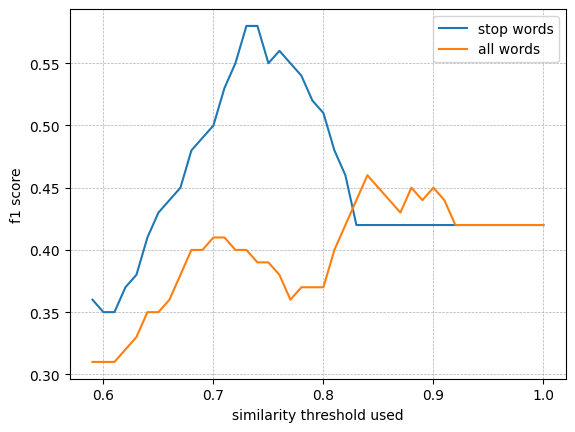

In [82]:
# testing using all words vs without stop words with one method: full review vs full ref for good efficacy label
code_of_interest ="c_good_efficacy"
word_mode = "all_words"
baseline_all_words = full_review_vs_whole_ref_bag(bag_good_efficacy,df[code_of_interest],code_of_interest,"baseline_all_words")

word_mode = "stop"
bag_good_efficacy_stop = nlp(" ".join([message for message in stop_word_text_list(c_good_efficacy_curated.text_avis)]))
baseline_stop_words = full_review_vs_whole_ref_bag(bag_good_efficacy_stop,df[code_of_interest],code_of_interest,"baseline_stop_words")
import matplotlib.pyplot as plt

plt.plot(test_thresh,baseline_stop_words, label ="stop words")
plt.plot(test_thresh, baseline_all_words, label = "all words")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel("similarity threshold used")
plt.ylabel("f1 score")
plt.legend()
plt.show();

We will test both stop words and full words in similarity matching

In [117]:
# making stop word versions of our reference documents
bag_good_comm_stop = nlp(" ".join([message for message in stop_word_text_list(c_good_comm_curated.text_avis)]))
bag_bad_comm_stop = nlp(" ".join([message for message in stop_word_text_list(c_bad_comm_curated.text_avis)]))
bag_good_value_stop = nlp(" ".join([message for message in stop_word_text_list(c_good_value_curated.text_avis)]))
bag_bad_value_stop = nlp(" ".join([message for message in stop_word_text_list(c_bad_value_curated.text_avis)]))
bag_good_efficacy_stop = nlp(" ".join([message for message in stop_word_text_list(c_good_efficacy_curated.text_avis)]))
bag_bad_efficacy_stop = nlp(" ".join([message for message in stop_word_text_list(c_bad_efficacy_curated.text_avis)]))

Running similarity grids to test best granularity (sentence vs whole text; ref as whole ref, as sentence or replaced by keywords) for STOP words

In [363]:

# good com allwords and stopwords
grid_thresh(bag_bad_comm,df.text_total, df["c_bad_comm"],"c_bad_comm",test_thresh, "attentif disponible poli", "train")
grid_thresh(bag_bad_comm,df.text_stop, df["c_bad_comm"],"c_bad_comm",test_thresh, "attentif disponible poli", "train")

# bad com allwords and stopwords
grid_thresh(bag_bad_comm,df.text_total, df["c_bad_comm"],"c_bad_comm",test_thresh, "malpoli m√©pris", "train")
grid_thresh(bag_bad_comm,df.text_stop, df["c_bad_comm"],"c_bad_comm",test_thresh, "malpoli m√©pris", "train")

# good value allwords and stopwords
grid_thresh(bag_bad_comm,df.text_total, df["c_bad_comm"],"c_bad_comm",test_thresh, "abordable accord√©", "train")
grid_thresh(bag_bad_comm,df.text_stop, df["c_bad_comm"],"c_bad_comm",test_thresh, "abordable accord√©", "train")

# bad value allwords and stopwords
grid_thresh(bag_bad_comm,df.text_total, df["c_bad_comm"],"c_bad_comm",test_thresh, "cher refus√©", "train")
grid_thresh(bag_bad_comm,df.text_stop, df["c_bad_comm"],"c_bad_comm",test_thresh, "cher refus√©", "train")

# good efficacy allwords and stopwords
grid_thresh(bag_bad_comm,df.text_total, df["c_bad_comm"],"c_bad_comm",test_thresh, "super efficace rapide", "train")
grid_thresh(bag_bad_comm,df.text_stop, df["c_bad_comm"],"c_bad_comm",test_thresh, "super efficace rapide")

# bad efficacy allwords and stopwords
grid_thresh(bag_bad_comm,df.text_total, df["c_bad_comm"],"c_bad_comm",test_thresh, "malpoli m√©pris", "train")
grid_thresh(bag_bad_comm,df.text_stop, df["c_bad_comm"],"c_bad_comm",test_thresh, "malpoli m√©pris", "train")


passing  review_sentence_vs_whole_ref_bag


In [84]:
list_exemples_tout = df['text_stop']
word_mode = "stop"

# good efficacy w/o stop words
code_of_interest ="c_good_efficacy"
etalon = nlp("super efficace rapide") 
grid_thresh_granularity(etalon,bag_good_efficacy_stop,df[code_of_interest],code_of_interest, "train")

# bad efficacy w/o stop words
code_of_interest ="c_bad_efficacy"
etalon = nlp("nul inefficace lent") 
grid_thresh_granularity(etalon,bag_bad_efficacy_stop,df[code_of_interest],code_of_interest,"train")

# good comm w/o stop words
code_of_interest ="c_good_comm"
etalon = nlp("attentif disponible poli") 
grid_thresh_granularity(etalon,bag_good_comm_stop,df[code_of_interest],code_of_interest,"train")

# bad comm w/o stop words
code_of_interest ="c_bad_comm"
etalon = nlp("m√©pris silence malpoli") 
grid_thresh_granularity(etalon,bag_bad_comm_stop,df[code_of_interest],code_of_interest,"train")

# good value stop w/o stop words
code_of_interest ="c_good_value"
etalon = nlp("abordable accord√©") 
grid_thresh_granularity(etalon,bag_good_value_stop,df[code_of_interest],code_of_interest,"train")

# bad value stop w/o stop words
code_of_interest ="c_bad_value"
etalon = nlp("cher refus√©") 
grid_thresh_granularity(etalon,bag_bad_value_stop,df[code_of_interest],code_of_interest,"train")

passing  train_full_review_vs_whole_ref_bag
for c_good_efficacy best score: 0.58 using similarity thresh of 0.78
passing  train_review_sentence_vs_whole_ref_bag
for c_good_efficacy best score: 0.56 using similarity thresh of 0.75
passing  train_review_sentence_vs_ref_√©talon
for c_good_efficacy best score: 0.57 using similarity thresh of 0.59
passing  train_full_review_vs_√©talon
for c_good_efficacy best score: 0.54 using similarity thresh of 0.59
passing  train_review_sentence_vs_reference_sentence
for c_good_efficacy best score: 0.59 using similarity thresh of 0.82
             label                                         test  word_mode  \
0  c_good_efficacy       train_review_sentence_vs_whole_ref_bag       stop   
0  c_good_efficacy  train_review_sentence_vs_reference_sentence       stop   
0  c_good_efficacy                           baseline_all_words  all_words   
0  c_good_efficacy                  train_full_review_vs_√©talon       stop   
0  c_good_efficacy                 

Running the Benchmark with all words

In [85]:
list_exemples_tout = df['text_total']
word_mode ="allwords"

# good efficacy
code_of_interest ="c_good_efficacy"
etalon = nlp("super efficace rapide") 
grid_thresh_granularity(etalon,bag_good_efficacy,df[code_of_interest],code_of_interest,"train")

# bad efficacy
code_of_interest ="c_bad_efficacy"
etalon = nlp("nul inefficace lent") 
grid_thresh_granularity(etalon,bag_bad_efficacy,df[code_of_interest],code_of_interest,"train")

# good comm
code_of_interest ="c_good_comm"
etalon = nlp("attentif disponible poli") 
grid_thresh_granularity(etalon,bag_good_comm,df[code_of_interest],code_of_interest,"train")

# bad comm
code_of_interest ="c_bad_comm"
etalon = nlp("m√©pris silence malpoli") 
grid_thresh_granularity(etalon,bag_bad_comm,df[code_of_interest],code_of_interest,"train")

# good value stop
code_of_interest ="c_good_value"
etalon = nlp("abordable accord√©") 
grid_thresh_granularity(etalon,bag_good_value,df[code_of_interest],code_of_interest,"train")

# bad value stop
code_of_interest ="c_bad_value"
etalon = nlp("cher refus√©") 
grid_thresh_granularity(etalon,bag_bad_value,df[code_of_interest],code_of_interest,"train")

passing  train_full_review_vs_whole_ref_bag
for c_good_efficacy best score: 0.49 using similarity thresh of 0.89
passing  train_review_sentence_vs_whole_ref_bag
for c_good_efficacy best score: 0.45 using similarity thresh of 0.75
passing  train_review_sentence_vs_ref_√©talon
for c_good_efficacy best score: 0.53 using similarity thresh of 0.64
passing  train_full_review_vs_√©talon
for c_good_efficacy best score: 0.5 using similarity thresh of 0.59
passing  train_review_sentence_vs_reference_sentence
for c_good_efficacy best score: 0.67 using similarity thresh of 0.82
             label                                         test  word_mode  \
0  c_good_efficacy       train_review_sentence_vs_whole_ref_bag       stop   
0  c_good_efficacy          train_review_sentence_vs_ref_√©talon   allwords   
0  c_good_efficacy  train_review_sentence_vs_reference_sentence       stop   
0  c_good_efficacy                  train_full_review_vs_√©talon   allwords   
0  c_good_efficacy       train_revi

Let's make a heatmap to see the F1 Scores of the different methods

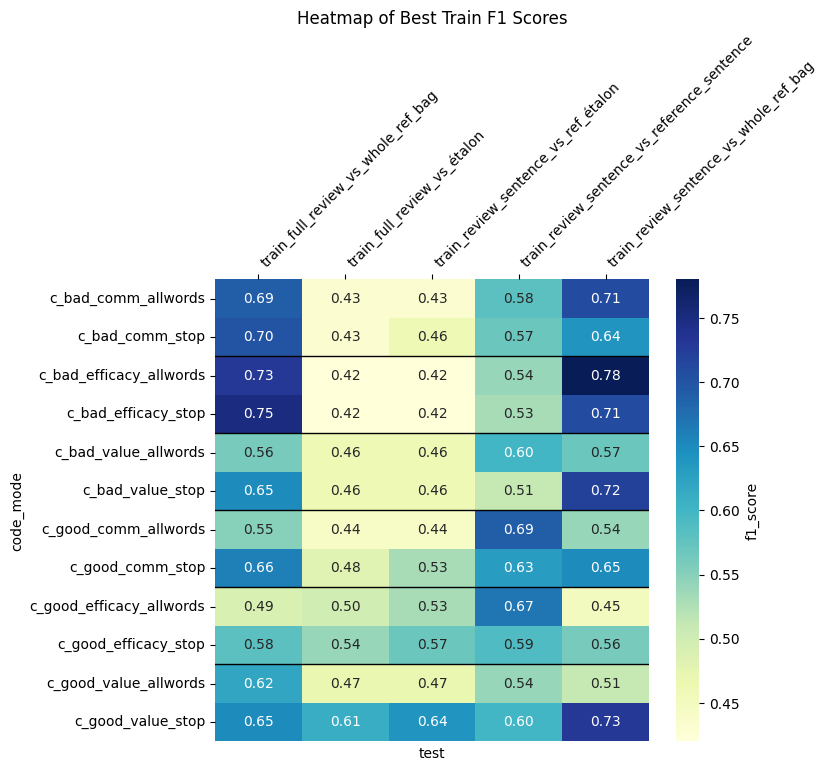

In [158]:
from os import listdir
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# compile the grid results

def compile_benchmarks (test_train):
    bench_list = listdir("../reports/similarity/raw")
    try: 
        bench_list.remove(".DS_Store")
    except:
        print("error in remove")
    bench_list = [path for path in bench_list if "baseline" not in path]
    if test_train == "train":
        bench_list = [path for path in bench_list if "test" not in path]
    elif test_train == "test":   
        bench_list = [path for path in bench_list if "test" in path]
    benchmark = pd.DataFrame()
    for file in bench_list:
        df = pd.read_csv(f'../reports/similarity/raw/{file}', index_col=0)
        benchmark = pd.concat([benchmark, df])
    benchmark = benchmark.sort_values("f1_score", ascending = False)
    benchmark['code_mode'] = benchmark.label + "_" + benchmark['word_mode']
    return benchmark

benchmark = compile_benchmarks("train")

def heat():
    # pivot table heatmap
    pivot = benchmark.pivot_table(index='code_mode', columns='test', values='f1_score')
    plt.figure(figsize=(7, 6))  
    heatmap = sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0, linecolor='grey')

    # horizontal lines 
    for i in range(2, len(pivot.index), 2):
        plt.axhline(i, color='black', linestyle='-', linewidth=1)

    # Label the color bar
    color_bar = heatmap.collections[0].colorbar
    color_bar.set_label('f1_score')

    plt.title('Heatmap of Best Train F1 Scores')
    heatmap.xaxis.tick_top() 
    plt.xticks(rotation=45, ha='left')  # Align the x-ticks properly
    plt.show()
heat()

The heatmap shows that using **keywords** (√©talon) generraly drives _worse results_ than example based solutions, all the more so for labels that have many exemples (bad communicatin, bad efficacy). 

Results are more _nuanced_ regarding the use of **all words** or **removing stopwords** and on using the **whole document** (review or reference exemples) or **sentence** based similarity scoring. 

**The better F1 Scores** were obtained using:
* Full review vs full reference document using:
    * stopwords (for c_good_value_allwords **.65**, c_bad_efficacy_stop **.74**)
    * allwords (c_bad_com_stop, **70**, c_bad_efficacy_allwords **.74**, c_good_efficacy_allwords **.67**)
* Review sentence vs reference sentences with all words (c_good_comm_allwords **.69**),
* Review sentence vs whole reference document using both:
    * All words (c_bad_efficacy_allwords **.78**, c_bad_com_allwords **.71**).
    * Stop (c_bad_efficacy_stop **.71**, c_good_value_stop **.67**) 

One label labels has F1-scores under .65: c_bad_value_stop (**.62**) using review sentences vs whole reference document

Overall **results could be improved** by:
* **Labelling more messages** to make more robust training dataset. 
    * If the selection of the labels reference sentences  becomes tedious with larger sets, it could be automated by running **TF/IDF** between the reference documents and only keeping words which are prevalent and relevant to each. For this smaller subset I prefered to rely on my own judgment and experience in qualitative research to select best sentences.
* Using a **stronger deep learning models like Camembert** (or BERT for English):
    * for finer semantic text similarity. Here we used fr_core_news_lg which has less parameters but can be conveniently used within spaCy.
    * to add a decision layer based on sentiment of the sentence to distinguish between negative and positive user sentiment within a thematic context, for instance "tr√®s mauvaise relation client avec le conseiller" and "tr√®s bonne relation client avec le conseiller" have very similar semantics and can trigger false positives when trying to label for either c_good_com or c_bad_com.

These results are based on the training dataset, we will run the best parameters on the **test** dataset to see how our scores handle unseen data.

To do that, we will extract the **optimal parameters** (document granularity, all word/stopwords, optimal threshold) to run the labelling on the test and then on the larger dataset in the best available conditions.

In [91]:
benchmark[0:1]

label                                    test word_mode  f1_score  \
0  c_bad_efficacy  train_review_sentence_vs_whole_ref_bag  allwords      0.78   

   threshold_used                code_mode  
0            0.84  c_bad_efficacy_allwords

In [96]:
best_params = pd.DataFrame()
def compile_best_params(label,best_params):
    code_df = benchmark[benchmark['label'] == label]
    best_threshold_index = code_df['f1_score'].idxmax()
    best_threshold = code_df['threshold_used'].iloc[best_threshold_index]
    best_method = code_df['test'].iloc[best_threshold_index]
    best_accuracy = code_df['f1_score'].iloc[best_threshold_index]
    best_mode = code_df['word_mode'].iloc[best_threshold_index]

    temp_df = pd.DataFrame({
        "label": [label],
        "Accuracy": [best_accuracy],
        "best_threshold": [best_threshold],
        "Method": [best_method],
        "Word mode": [best_mode]
    })
    best_params = pd.concat([best_params, temp_df], ignore_index= True)
    return best_params
label_names = set(benchmark["label"])
for label in label_names:
    best_params = compile_best_params(label,best_params)
best_params


label  Accuracy  best_threshold  \
0      c_bad_value      0.72            0.66   
1   c_bad_efficacy      0.78            0.84   
2       c_bad_comm      0.71            0.83   
3     c_good_value      0.73            0.80   
4  c_good_efficacy      0.67            0.82   
5      c_good_comm      0.69            0.82   

                                        Method Word mode  
0       train_review_sentence_vs_whole_ref_bag      stop  
1       train_review_sentence_vs_whole_ref_bag  allwords  
2       train_review_sentence_vs_whole_ref_bag  allwords  
3       train_review_sentence_vs_whole_ref_bag      stop  
4  train_review_sentence_vs_reference_sentence  allwords  
5  train_review_sentence_vs_reference_sentence  allwords

In [97]:
# save best parameters
best_params.to_csv('../reports/similarity/best_params.csv')

# check selected methods
set(best_params.Method)

{'train_review_sentence_vs_reference_sentence',
 'train_review_sentence_vs_whole_ref_bag'}

In [171]:
# adapt functions to test conditions

def one_shot_full_review_vs_whole_ref_bag(bag_of_ref,y,code_of_interest,thresh):
    test_name = "review_vs_whole_ref_bag"
    print("passing",test_name)
    y_pred = []
    for i, message in enumerate(list_exemples_tout):
        sim_score = []
        message = nlp(message)
        try:
            temp_sim_score = round(bag_of_ref.similarity(message),2)
            sim_score.append(temp_sim_score)
        except:
            print("issue with vector")
            sim_score.append(0)
        allocate_lab(sim_score,y_pred,thresh)
    macro_f1 = similarity_report(y,y_pred)
    wrap_test(test_name,code_of_interest,thresh,macro_f1)
    return(macro_f1)

def one_shot_review_sentence_vs_reference_sentence(bag_of_ref,y,code_of_interest,thresh):
    test_name = "review_sentence_vs_reference_sentence"
    print("passing",test_name)
    y_pred = []
    for message in list_exemples_tout:
        sim_score= []
        message = nlp(message)
        sentences = message.sents
        sentences_exemples = bag_of_ref.sents
        for sentence in sentences:
            if sentence.has_vector:
                for sentence_exemple in sentences_exemples:
                    if sentence_exemple.has_vector:
                        try:
                            temp_sim_score = round(bag_of_ref.similarity(sentence),2)
                            sim_score.append(temp_sim_score)
                        except:
                            print("issue with vector")
                            sim_score.append(0)
        allocate_lab(sim_score,y_pred,thresh)
    macro_f1 = similarity_report(y,y_pred)
    wrap_test(test_name,code_of_interest,thresh,macro_f1)
    return(macro_f1)

def one_shot_review_sentence_vs_whole_ref_bag(bag_of_ref,y,code_of_interest,thresh):
    test_name = "review_sentence_vs_whole_ref_bag"
    print("passing",test_name)
    y_pred = []
    for message in list_exemples_tout:
        sim_score= []
        message = nlp(message)
        sentences = message.sents
        for sentence in sentences:
            print(sentence)
            if sentence.has_vector:
                try:
                    temp_sim_score = round(bag_of_ref.similarity(sentence),2)
                    sim_score.append(temp_sim_score)
                except:
                    print("issue with vector")
                    sim_score.append(0)
        allocate_lab(sim_score,y_pred,thresh)
    macro_f1 = similarity_report(y,y_pred)
    wrap_test(test_name,code_of_interest,thresh,macro_f1)
    return(macro_f1)


def test_grid_thresh_granularity(bag,y,code_of_interest, thresh, train_test):
    
    # [full review] vs [bag of exemples]
    test_full_review_vs_whole_ref_bag(bag,y,code_of_interest,thresh)

    # [reviews sentences] vs [bag of exemples]
    test_review_sentence_vs_whole_ref_bag(bag,y,code_of_interest,thresh)

    # [reviews sentences] vs [bag of exemples sentences] 
    test_review_sentence_vs_reference_sentence(bag,y,code_of_interest,thresh)

    # compiling and sorting the grid results for granularity and similarity threshold
    compile_segundo(code_of_interest, train_test)

In [134]:
test = pd.read_excel("../data/avis/general_df_clean_sent_15k_manual_code.xlsx",
                                   sheet_name = "test", index_col= 0)
test.text_avis = [message.replace("‚Ç¨", " euros") for message in test.text_avis]
test["text_stop"] = stop_word_text_list(test['text_avis'])
resonance = "na"
 

In [153]:
word_mode ="stop"
list_exemples_tout = test.text_avis.fillna("na")
#list_exemples_tout = test.text_stop.fillna("na")

y = test.c_good_comm
test_grid_thresh_granularity(bag_good_comm_stop,y,"c_good_com",0.82, "test")

y = test.c_bad_comm
test_grid_thresh_granularity(bag_bad_comm_stop,y,"c_bad_com", 0.83, "test")

y = test.c_good_efficacy
test_grid_thresh_granularity(bag_good_comm_stop,y,"c_good_efficacy", 0.82, "test")

y = test.c_bad_efficacy
test_grid_thresh_granularity(bag_bad_comm_stop,y,"c_bad_efficacy", 0.84, "test")

y = test.c_good_value
test_grid_thresh_granularity(bag_good_value_stop,y,"c_good_value", 0.82, "test")

y = test.c_bad_value
test_grid_thresh_granularity(bag_bad_value_stop,y,"c_bad_value", 0.82, "test") # we did not keep .76 as it yielded bad test results, and chose a value closer to all other assessments (chose dominant threshold found for other labels: .82)

passing test_review_vs_whole_ref_bag
passing test_review_sentence_vs_whole_ref_bag
Mes virements du mois d'aout pour remettre √† o mon accessio et pour solder un pret n'ont pas √©t√© imput√©s sur les bons contrats malgr√© mes mails.
De plus il a fallu que je telephone √† plusieurs reprises pour que ce soit remis en ordre.
J‚Äôai essay√© de faire de l‚Äôessence avec ma carte, paiement refus√© car pas de provisions alors que j‚Äôai 111 euros sur mon compte‚Ä¶ avec les autres banque je peux faire de l‚Äôessence √† la hauteur du restant sur le compte.
c'√©tait un bon √©change m√™me si un peu difficile dans la compr√©hension.
Ma carte a √©t√© bloqu√©e fin f√©vrier car quelqu'un avait mal saisi le code 3 fois!
En connaissant mon code, j'ai r√©alis√© que quelqu'un avait peut-√™tre copi√© ma carte.
Mon mari (qui parle fran√ßais) a donc entam√© un voyage √©pique qui a √©t√© finalis√© aujourd'hui le 24 avril, par un membre efficace de l'Ing.
Elle m'a mis en contact avec un service pour saisir mo

In [154]:
benchmark = compile_benchmarks("test")

In [166]:
word_mode ="allwords"
list_exemples_tout = test.text_avis.fillna("na")
#list_exemples_tout = test.text_stop.fillna("na")

y = test.c_good_comm
test_grid_thresh_granularity(bag_good_comm,y,"c_good_com",0.70, "test")

y = test.c_bad_comm
test_grid_thresh_granularity(bag_bad_comm,y,"c_bad_com", 0.70, "test")

y = test.c_good_efficacy
test_grid_thresh_granularity(bag_good_comm,y,"c_good_efficacy", 0.70, "test")

y = test.c_bad_efficacy
test_grid_thresh_granularity(bag_bad_comm,y,"c_bad_efficacy", 0.70, "test")

y = test.c_good_value
test_grid_thresh_granularity(bag_good_value,y,"c_good_value", 0.70, "test")

y = test.c_bad_value
test_grid_thresh_granularity(bag_bad_value,y,"c_bad_value", 0.70, "test") # we did not keep .76 as it yielded bad test results, and chose a value closer to all other assessments (chose dominant threshold found for other labels: .82)

passing test_review_vs_whole_ref_bag
passing test_review_sentence_vs_whole_ref_bag
Mes virements du mois d'aout pour remettre √† o mon accessio et pour solder un pret n'ont pas √©t√© imput√©s sur les bons contrats malgr√© mes mails.
De plus il a fallu que je telephone √† plusieurs reprises pour que ce soit remis en ordre.
J‚Äôai essay√© de faire de l‚Äôessence avec ma carte, paiement refus√© car pas de provisions alors que j‚Äôai 111 euros sur mon compte‚Ä¶ avec les autres banque je peux faire de l‚Äôessence √† la hauteur du restant sur le compte.
c'√©tait un bon √©change m√™me si un peu difficile dans la compr√©hension.
Ma carte a √©t√© bloqu√©e fin f√©vrier car quelqu'un avait mal saisi le code 3 fois!
En connaissant mon code, j'ai r√©alis√© que quelqu'un avait peut-√™tre copi√© ma carte.
Mon mari (qui parle fran√ßais) a donc entam√© un voyage √©pique qui a √©t√© finalis√© aujourd'hui le 24 avril, par un membre efficace de l'Ing.
Elle m'a mis en contact avec un service pour saisir mo

In [155]:
best_params

label  Accuracy  best_threshold  \
0      c_bad_value      0.72            0.66   
1   c_bad_efficacy      0.78            0.84   
2       c_bad_comm      0.71            0.83   
3     c_good_value      0.73            0.80   
4  c_good_efficacy      0.67            0.82   
5      c_good_comm      0.69            0.82   

                                        Method Word mode  
0       train_review_sentence_vs_whole_ref_bag      stop  
1       train_review_sentence_vs_whole_ref_bag  allwords  
2       train_review_sentence_vs_whole_ref_bag  allwords  
3       train_review_sentence_vs_whole_ref_bag      stop  
4  train_review_sentence_vs_reference_sentence  allwords  
5  train_review_sentence_vs_reference_sentence  allwords

In [164]:
# running the test
list_exemples_tout_allwords = test.text_avis.fillna("na")
list_exemples_tout_stop = test.text_stop.fillna("na")

y = test.c_good_comm
list_exemples_tout = list_exemples_tout_allwords
test_review_sentence_vs_reference_sentence(bag_good_comm,y,"c_good_com", 0.82)

y = test.c_bad_comm
list_exemples_tout = list_exemples_tout_allwords
test_review_sentence_vs_whole_ref_bag(bag_bad_comm,y,"c_bad_com", 0.83)

y = test.c_good_efficacy
list_exemples_tout = list_exemples_tout_allwords
test_review_sentence_vs_reference_sentence(bag_good_comm,y,"c_good_efficacy", 0.82)

y = test.c_bad_efficacy
list_exemples_tout = list_exemples_tout_stop
test_review_sentence_vs_whole_ref_bag(bag_bad_comm,y,"c_bad_efficacy", 0.84)

y = test.c_good_value
list_exemples_tout = list_exemples_tout_stop
test_review_sentence_vs_whole_ref_bag(bag_good_value_stop,y,"c_good_value", 0.82)

y = test.c_bad_value
list_exemples_tout = list_exemples_tout_stop
test_review_sentence_vs_whole_ref_bag(bag_bad_value_stop,y,"c_bad_value", 0.66) # we did not keep .76 as it yielded bad test results, and chose a value closer to all other assessments (chose dominant threshold found for other labels: .82)

passing test_review_sentence_vs_reference_sentence
passing test_review_sentence_vs_whole_ref_bag
Mes virements du mois d'aout pour remettre √† o mon accessio et pour solder un pret n'ont pas √©t√© imput√©s sur les bons contrats malgr√© mes mails.
De plus il a fallu que je telephone √† plusieurs reprises pour que ce soit remis en ordre.
J‚Äôai essay√© de faire de l‚Äôessence avec ma carte, paiement refus√© car pas de provisions alors que j‚Äôai 111 euros sur mon compte‚Ä¶ avec les autres banque je peux faire de l‚Äôessence √† la hauteur du restant sur le compte.
c'√©tait un bon √©change m√™me si un peu difficile dans la compr√©hension.
Ma carte a √©t√© bloqu√©e fin f√©vrier car quelqu'un avait mal saisi le code 3 fois!
En connaissant mon code, j'ai r√©alis√© que quelqu'un avait peut-√™tre copi√© ma carte.
Mon mari (qui parle fran√ßais) a donc entam√© un voyage √©pique qui a √©t√© finalis√© aujourd'hui le 24 avril, par un membre efficace de l'Ing.
Elle m'a mis en contact avec un service 

0.68

In [157]:
label_names = set(benchmark["label"])
for label in label_names:
    best_params = compile_best_params(label,best_params)
best_params


label  Accuracy  best_threshold  \
0       c_bad_value      0.72            0.66   
1    c_bad_efficacy      0.78            0.84   
2        c_bad_comm      0.71            0.83   
3      c_good_value      0.73            0.80   
4   c_good_efficacy      0.67            0.82   
5       c_good_comm      0.69            0.82   
6       c_bad_value      0.47            0.82   
7    c_bad_efficacy      0.80            0.84   
8      c_good_value      0.62            0.82   
9   c_good_efficacy      0.53            0.82   
10       c_good_com      0.49            0.82   
11        c_bad_com      0.61            0.83   

                                         Method Word mode  
0        train_review_sentence_vs_whole_ref_bag      stop  
1        train_review_sentence_vs_whole_ref_bag  allwords  
2        train_review_sentence_vs_whole_ref_bag  allwords  
3        train_review_sentence_vs_whole_ref_bag      stop  
4   train_review_sentence_vs_reference_sentence  allwords  
5   train_review_sentence_vs_reference_sentence  allwords  
6         test_review_sentence_vs_whole_ref_bag      stop  
7                  test_review_vs_whole_ref_bag  allwords  
8                  test_review_vs_whole_ref_bag      stop  
9    test_review_sentence_vs_reference_sentence  allwords  
10   test_review_sentence_vs_reference_sentence  allwords  
11        test_review_sentence_vs_whole_ref_bag  allwords

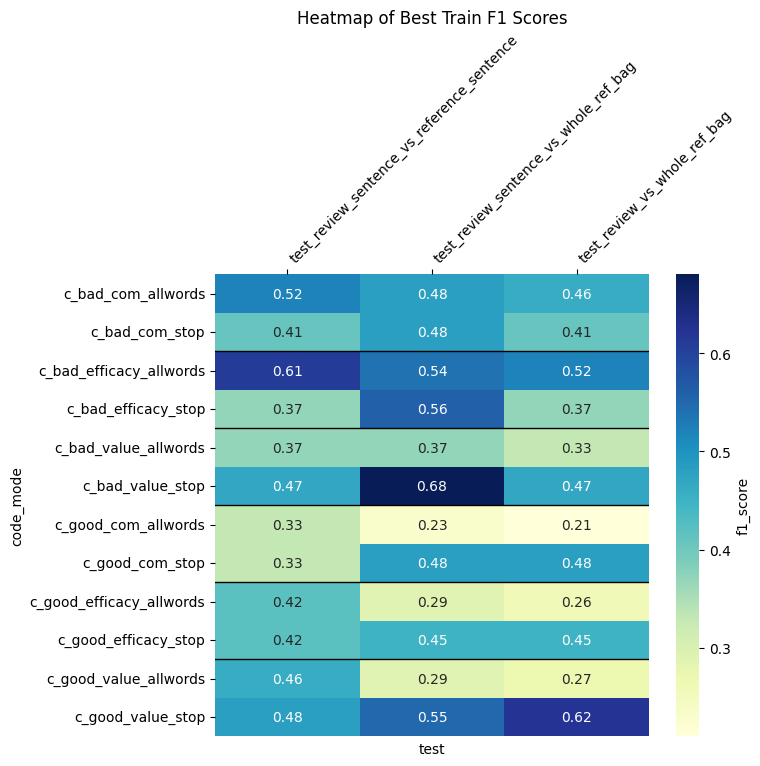

In [167]:
benchmark=compile_benchmarks("test")
heat()

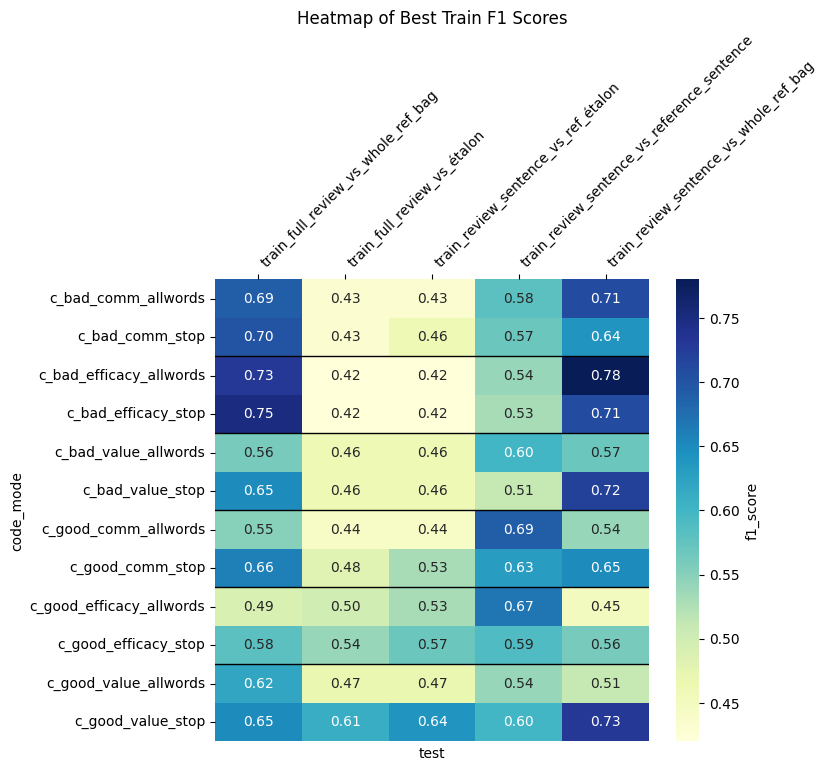

In [180]:
# searching optimal thresh on test / VAlIDATION?

list_exemples_tout = test['text_stop']
word_mode = "stop"
train_test = "test"

# good efficacy w/o stop words
code_of_interest ="c_good_efficacy"
etalon = nlp("super efficace rapide") 
grid_thresh_granularity(etalon,bag_good_efficacy_stop,test[code_of_interest],code_of_interest, "test")

# bad efficacy w/o stop words
code_of_interest ="c_bad_efficacy"
etalon = nlp("nul inefficace lent") 
grid_thresh_granularity(etalon,bag_bad_efficacy_stop,test[code_of_interest],code_of_interest,"test")

# good comm w/o stop words
code_of_interest ="c_good_comm"
etalon = nlp("attentif disponible poli") 
grid_thresh_granularity(etalon,bag_good_comm_stop,test[code_of_interest],code_of_interest,"test")

# bad comm w/o stop words
code_of_interest ="c_bad_comm"
etalon = nlp("m√©pris silence malpoli") 
grid_thresh_granularity(etalon,bag_bad_comm_stop,test[code_of_interest],code_of_interest,"test")

# good value stop w/o stop words
code_of_interest ="c_good_value"
etalon = nlp("abordable accord√©") 
grid_thresh_granularity(etalon,bag_good_value_stop,test[code_of_interest],code_of_interest,"test")

# bad value stop w/o stop words
code_of_interest ="c_bad_value"
etalon = nlp("cher refus√©") 
grid_thresh_granularity(etalon,bag_bad_value_stop,test[code_of_interest],code_of_interest,"test")

passing  train_full_review_vs_whole_ref_bag
for c_good_efficacy best score: 0.53 using similarity thresh of 0.8
passing  train_review_sentence_vs_whole_ref_bag
for c_good_efficacy best score: 0.61 using similarity thresh of 0.74
passing  train_review_sentence_vs_ref_√©talon
for c_good_efficacy best score: 0.52 using similarity thresh of 0.63
passing  train_full_review_vs_√©talon
for c_good_efficacy best score: 0.52 using similarity thresh of 0.59
passing  train_review_sentence_vs_reference_sentence
for c_good_efficacy best score: 0.55 using similarity thresh of 0.68
             label                                         test word_mode  \
0  c_good_efficacy       train_review_sentence_vs_whole_ref_bag      stop   
0  c_good_efficacy          train_review_sentence_vs_ref_√©talon      stop   
0  c_good_efficacy   test_review_sentence_vs_reference_sentence  allwords   
0  c_good_efficacy        test_review_sentence_vs_whole_ref_bag      stop   
0  c_good_efficacy                 test_r

In [181]:
# searching optimal thresh on test / VAlIDATION?

list_exemples_tout = test['text_avis']
word_mode = "allwords"
train_test = "test"

# good efficacy w/o stop words
code_of_interest ="c_good_efficacy"
etalon = nlp("super efficace rapide") 
grid_thresh_granularity(etalon,bag_good_efficacy,test[code_of_interest],code_of_interest, "test")

# bad efficacy w/o stop words
code_of_interest ="c_bad_efficacy"
etalon = nlp("nul inefficace lent") 
grid_thresh_granularity(etalon,bag_bad_efficacy,test[code_of_interest],code_of_interest,"test")

# good comm w/o stop words
code_of_interest ="c_good_comm"
etalon = nlp("attentif disponible poli") 
grid_thresh_granularity(etalon,bag_good_comm,test[code_of_interest],code_of_interest,"test")

# bad comm w/o stop words
code_of_interest ="c_bad_comm"
etalon = nlp("m√©pris silence malpoli") 
grid_thresh_granularity(etalon,bag_bad_comm,test[code_of_interest],code_of_interest,"test")

# good value stop w/o stop words
code_of_interest ="c_good_value"
etalon = nlp("abordable accord√©") 
grid_thresh_granularity(etalon,bag_good_value,test[code_of_interest],code_of_interest,"test")

# bad value stop w/o stop words
code_of_interest ="c_bad_value"
etalon = nlp("cher refus√©") 
grid_thresh_granularity(etalon,bag_bad_value,test[code_of_interest],code_of_interest,"test")

passing  train_full_review_vs_whole_ref_bag
for c_good_efficacy best score: 0.5 using similarity thresh of 0.87
passing  train_review_sentence_vs_whole_ref_bag
for c_good_efficacy best score: 0.55 using similarity thresh of 0.88
passing  train_review_sentence_vs_ref_√©talon
for c_good_efficacy best score: 0.59 using similarity thresh of 0.6
passing  train_full_review_vs_√©talon
for c_good_efficacy best score: 0.59 using similarity thresh of 0.6
passing  train_review_sentence_vs_reference_sentence
for c_good_efficacy best score: 0.51 using similarity thresh of 0.87
             label                                         test word_mode  \
0  c_good_efficacy       train_review_sentence_vs_whole_ref_bag      stop   
0  c_good_efficacy          train_review_sentence_vs_ref_√©talon      stop   
0  c_good_efficacy                  train_full_review_vs_√©talon  allwords   
0  c_good_efficacy   test_review_sentence_vs_reference_sentence  allwords   
0  c_good_efficacy        test_review_sent

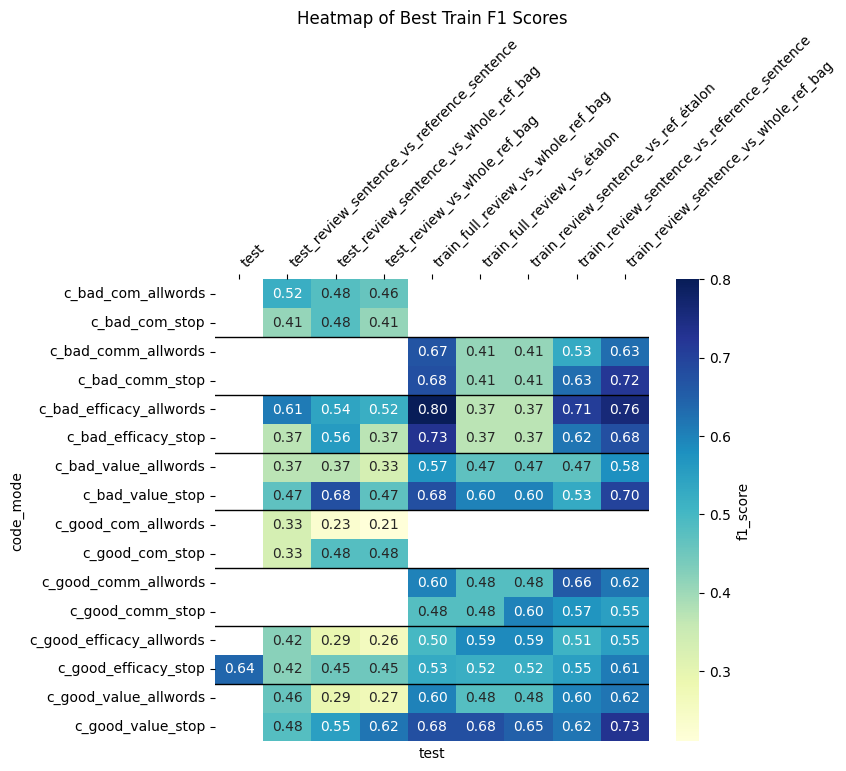

In [182]:
benchmark=compile_benchmarks("test")
heat()